# Data Analysis & Visualization

This notebook provides comprehensive analysis and professional visualizations for your research report.

## Objectives
1. Aggregate all experimental data
2. Generate statistical insights
3. Create publication-quality visualizations
4. Provide data for report writing

In [32]:
# Setup
import sys
sys.path.append('../src')

from database import HallucinationDB
from config import Config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries loaded")

✓ Libraries loaded


## Load All Data

In [33]:
# Connect to database
db = HallucinationDB()

# Get all experiments
df_experiments = db.get_all_experiments()
print("Experiments Summary:")
print(df_experiments)

# Get overall statistics
stats = db.get_statistics()
print(f"\nTotal experiments: {stats['total_experiments']}")
print(f"Total tests conducted: {stats['total_tests']}")

print("\nHallucination rates by mitigation strategy:")
print(stats['hallucination_by_strategy'])

Experiments Summary:
    experiment_id                                               name  \
0              20  Comparative Analysis - RAG (Retrieval-Augmente...   
1              21           Comparative Analysis - Constitutional AI   
2              22  Comparative Analysis - Chain-of-Thought Verifi...   
3              17  Comparative Analysis - RAG (Retrieval-Augmente...   
4              18           Comparative Analysis - Constitutional AI   
5              19  Comparative Analysis - Chain-of-Thought Verifi...   
6              14  Comparative Analysis - RAG (Retrieval-Augmente...   
7              15           Comparative Analysis - Constitutional AI   
8              16  Comparative Analysis - Chain-of-Thought Verifi...   
9              12            Unintentional Hallucinations - Baseline   
10             13                           Control Tests - Baseline   
11             10            Unintentional Hallucinations - Baseline   
12             11                          

In [34]:
# Load all experimental results into one dataframe
all_results = []

for idx, exp in df_experiments.iterrows():
    exp_id = exp['experiment_id']
    df_exp = db.get_experiment_results(exp_id)
    all_results.append(df_exp)

if all_results:
    df_all = pd.concat(all_results, ignore_index=True)
    print(f"\nTotal data points: {len(df_all)}")
    print(f"Date range: {df_all['created_at'].min()} to {df_all['created_at'].max()}")
else:
    print("\n⚠️  No experimental data found. Please run the testing notebooks first.")
    df_all = pd.DataFrame()


Total data points: 218
Date range: 2025-11-02 07:38:59 to 2025-11-08 11:32:59


C:\Users\n22j1\AppData\Local\Temp\ipykernel_10088\1834144574.py:10: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



## 1. Overall Hallucination Rates

### 1.1 By Mitigation Strategy

In [ ]:
if not df_all.empty:
    # Calculate rates by strategy
    strategy_performance = df_all.groupby('mitigation_strategy').agg({
        'is_hallucination': ['count', 'sum', 'mean'],
        'response_time_ms': 'mean',
        'tokens_used': 'mean'
    }).round(3)
    
    strategy_performance.columns = ['Total Tests', 'Hallucinations', 'Hallucination Rate', 
                                    'Avg Response Time (ms)', 'Avg Tokens']
    # Ensure numeric type for Rate (%) column
    strategy_performance['Hallucination Rate (%)'] = (strategy_performance['Hallucination Rate'] * 100).astype(float).round(2)
    
    # Display with professional HTML styling
    from IPython.display import display, HTML
    
    html = """
    <style>
        .results-table {
            border-collapse: collapse;
            width: 100%;
            box-shadow: 0 4px 12px rgba(0,0,0,0.15);
            margin: 20px 0;
            border-radius: 8px;
            overflow: hidden;
        }
        .results-table th {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 16px;
            text-align: left;
            font-weight: 600;
            text-transform: uppercase;
            font-size: 11px;
            letter-spacing: 1px;
        }
        .results-table td {
            padding: 14px 16px;
            border-bottom: 1px solid #e8e8e8;
            font-size: 13px;
        }
        .results-table tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        .results-table tr:hover {
            background-color: #e3f2fd;
            transition: all 0.2s;
        }
        .badge {
            padding: 5px 12px;
            border-radius: 20px;
            font-weight: 700;
            font-size: 12px;
            display: inline-block;
        }
        .badge-success { background: #d4edda; color: #155724; border: 2px solid #c3e6cb; }
        .badge-warning { background: #fff3cd; color: #856404; border: 2px solid #ffeaa7; }
        .badge-danger { background: #f8d7da; color: #721c24; border: 2px solid #f5c6cb; }
        .metric-value {
            font-family: 'Courier New', monospace;
            font-weight: 600;
            color: #2c3e50;
        }
        .metric-highlight {
            background: #fff3cd;
            padding: 2px 6px;
            border-radius: 4px;
        }
        .hall-highlight {
            background: #f8d7da;
            padding: 2px 6px;
            border-radius: 4px;
            font-weight: 800;
        }
    </style>
    <h3 style="color: #2c3e50; font-family: Arial; margin-bottom: 10px;">Strategy Performance Metrics</h3>
    <table class="results-table">
        <thead>
            <tr>
                <th>Strategy</th>
                <th>Total Tests</th>
                <th>Hallucinations</th>
                <th>Hallucination Rate</th>
                <th>Avg Response Time</th>
                <th>Avg Tokens</th>
            </tr>
        </thead>
        <tbody>
    """
    
    for strategy, row in strategy_performance.iterrows():
        acc_val = 100 - row['Hallucination Rate (%)']
        if acc_val >= 95:
            badge = 'badge-success'
        elif acc_val >= 80:
            badge = 'badge-warning'
        else:
            badge = 'badge-danger'
        
        # Highlight hallucinations if present
        hall_class = 'hall-highlight' if int(row['Hallucinations']) > 0 else 'metric-value'
            
        html += f"""
            <tr>
                <td><strong style="font-size: 14px; color: #2c3e50;">{strategy.replace('_', ' ').title()}</strong></td>
                <td class="metric-value">{int(row['Total Tests'])}</td>
                <td class="{hall_class}">{int(row['Hallucinations'])}</td>
                <td><span class="badge {badge}">{row['Hallucination Rate (%)']:.2f}%</span></td>
                <td class="metric-value"><span class="metric-highlight">{row['Avg Response Time (ms)']:.0f} ms</span></td>
                <td class="metric-value"><span class="metric-highlight">{row['Avg Tokens']:.0f}</span></td>
            </tr>
        """
    
    html += "</tbody></table>"
    display(HTML(html))
    
    # Save to CSV
    strategy_performance.to_csv('../results/reports/strategy_performance.csv')
    print("\n✓ Saved to results/reports/strategy_performance.csv")

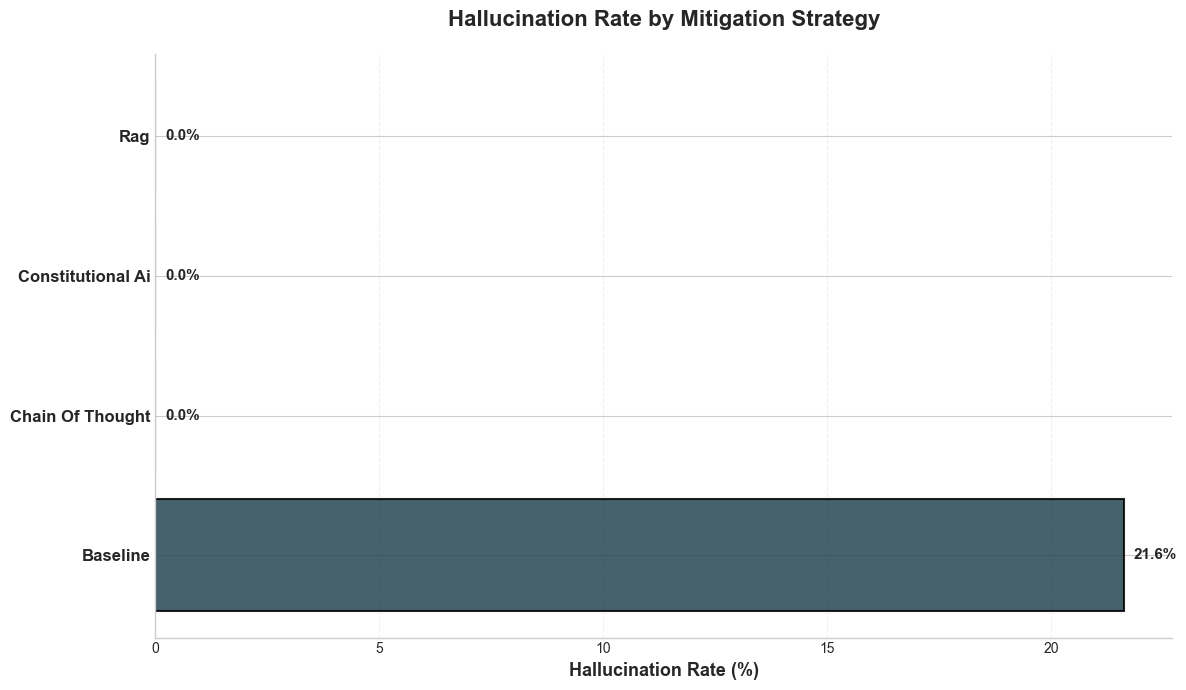

✓ Chart saved to results/charts/hallucination_rate_by_strategy.png


In [36]:
# Professional Visualization: Hallucination Rate Comparison
if not df_all.empty:
    # Set modern style (compatible with all seaborn versions)
    try:
        plt.style.use('seaborn-v0_8-whitegrid')
    except:
        try:
            plt.style.use('seaborn-whitegrid')
        except:
            plt.style.use('ggplot')
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    strategies = strategy_performance.index
    rates = strategy_performance['Hallucination Rate (%)'].values
    
    # Modern, professional color palette
    colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51']
    
    bars = ax.barh(range(len(strategies)), rates, color=colors[:len(strategies)], 
                   alpha=0.85, edgecolor='black', linewidth=1.5)
    
    ax.set_yticks(range(len(strategies)))
    ax.set_yticklabels([s.replace('_', ' ').title() for s in strategies], fontsize=12, fontweight='600')
    ax.set_xlabel('Hallucination Rate (%)', fontsize=13, fontweight='bold')
    ax.set_title('Hallucination Rate by Mitigation Strategy', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
    ax.set_axisbelow(True)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, rates)):
        width = bar.get_width()
        ax.text(width + max(rates)*0.01, bar.get_y() + bar.get_height()/2.,
               f'{val:.1f}%', ha='left', va='center', fontweight='bold', fontsize=11)
    
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('../results/charts/hallucination_rate_by_strategy.png', 
                dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    print("✓ Chart saved to results/charts/hallucination_rate_by_strategy.png")

### 1.2 By Prompt Category

In [ ]:
if not df_all.empty:
    # Category performance
    category_performance = df_all.groupby('prompt_category').agg({
        'is_hallucination': ['count', 'sum', 'mean']
    }).round(3)
    
    category_performance.columns = ['Total', 'Hallucinations', 'Rate']
    # Ensure numeric type for Rate (%) column
    category_performance['Rate (%)'] = (category_performance['Rate'] * 100).astype(float).round(2)
    category_performance = category_performance.sort_values('Rate (%)', ascending=False)
    
    # Display with professional HTML styling
    from IPython.display import display, HTML
    
    html = """
    <style>
        .results-table {
            border-collapse: collapse;
            width: 100%;
            box-shadow: 0 4px 12px rgba(0,0,0,0.15);
            margin: 20px 0;
            border-radius: 8px;
            overflow: hidden;
        }
        .results-table th {
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 16px;
            text-align: left;
            font-weight: 600;
            text-transform: uppercase;
            font-size: 11px;
            letter-spacing: 1px;
        }
        .results-table td {
            padding: 14px 16px;
            border-bottom: 1px solid #e8e8e8;
            font-size: 13px;
        }
        .results-table tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        .results-table tr:hover {
            background-color: #e3f2fd;
            transition: all 0.2s;
        }
        .badge {
            padding: 5px 12px;
            border-radius: 20px;
            font-weight: 700;
            font-size: 12px;
            display: inline-block;
        }
        .badge-success { background: #d4edda; color: #155724; border: 2px solid #c3e6cb; }
        .badge-warning { background: #fff3cd; color: #856404; border: 2px solid #ffeaa7; }
        .badge-danger { background: #f8d7da; color: #721c24; border: 2px solid #f5c6cb; }
        .metric-value {
            font-family: 'Courier New', monospace;
            font-weight: 600;
            color: #2c3e50;
        }
        .hall-highlight {
            background: #f8d7da;
            padding: 2px 6px;
            border-radius: 4px;
            font-weight: 800;
        }
    </style>
    <h3 style="color: #2c3e50; font-family: Arial; margin-bottom: 10px;">Hallucination Rate by Prompt Category</h3>
    <table class="results-table">
        <thead>
            <tr>
                <th>Prompt Category</th>
                <th>Total Tests</th>
                <th>Hallucinations</th>
                <th>Hallucination Rate</th>
            </tr>
        </thead>
        <tbody>
    """
    
    for category, row in category_performance.iterrows():
        rate_val = row['Rate (%)']
        if rate_val == 0:
            badge = 'badge-success'
        elif rate_val < 25:
            badge = 'badge-warning'
        else:
            badge = 'badge-danger'
        
        # Highlight hallucinations if present
        hall_class = 'hall-highlight' if int(row['Hallucinations']) > 0 else 'metric-value'
            
        html += f"""
            <tr>
                <td><strong style="font-size: 14px; color: #2c3e50;">{category.replace('_', ' ').title()}</strong></td>
                <td class="metric-value">{int(row['Total'])}</td>
                <td class="{hall_class}">{int(row['Hallucinations'])}</td>
                <td><span class="badge {badge}">{rate_val:.2f}%</span></td>
            </tr>
        """
    
    html += "</tbody></table>"
    display(HTML(html))

In [40]:
# ============================================================================
# CATEGORY vs STRATEGY HEATMAP ANALYSIS
# ============================================================================

if not df_all.empty:
    
    print("\n" + "="*80)
    print("HALLUCINATION RATE HEATMAP: CATEGORY vs STRATEGY")
    print("="*80)
    
    # Create pivot table with proper type conversion
    pivot = df_all.pivot_table(
        values='is_hallucination',
        index='prompt_category',
        columns='mitigation_strategy',
        aggfunc='mean'
    )
    
    # Ensure numeric type and convert to percentage
    pivot = pivot.astype(float) * 100
    
    print(f"\n📊 Heatmap Data:")
    print(f"   ✅ Prompt categories: {len(pivot.index)}")
    print(f"   ✅ Strategies: {len(pivot.columns)}")
    print(f"   ✅ Data points: {pivot.size}")
    
    # ============================================================================
    # PLOTLY INTERACTIVE HEATMAP - DARK MODE
    # ============================================================================
    
    print(f"\n🔨 Creating interactive heatmap...")
    
    # Prepare data for Plotly
    z_data = pivot.values
    x_labels = [col.replace('_', ' ').title() for col in pivot.columns]
    y_labels = [idx.replace('_', ' ').title() for idx in pivot.index]
    
    # Create heatmap
    fig = go.Figure(data=go.Heatmap(
        z=z_data,
        x=x_labels,
        y=y_labels,
        colorscale='RdYlGn_r',  # Red (high) to Green (low)
        zmid=50,  # Center at 50%
        zmin=0,
        zmax=100,
        text=np.round(z_data, 1),
        texttemplate='<b>%{text:.1f}%</b>',
        textfont=dict(size=11, family='Arial Black', color='#F9F6EE'),
        hovertemplate='<b>%{y}</b><br><b>%{x}</b><br>Hallucination Rate: %{z:.1f}%<extra></extra>',
        colorbar=dict(
            title=dict(
                text='<b>Hallucination<br>Rate (%)</b>',
                font=dict(size=13, family='Arial', color='#ecf0f1')
            ),
            tickfont=dict(size=11, family='Arial', color='#ecf0f1'),
            len=0.7,
            thickness=20
        )
    ))
    
    fig.update_layout(
        title=dict(
            text='<b>Hallucination Rate Heatmap: Category vs Strategy</b><br><sup>Green = Low hallucinations | Red = High hallucinations</sup>',
            x=0.5,
            xanchor='center',
            font=dict(size=20, color='#ecf0f1', family='Arial Black')
        ),
        xaxis=dict(
            title='<b>Mitigation Strategy</b>',
            titlefont=dict(size=14, family='Arial', color='#ecf0f1'),
            tickfont=dict(size=11, family='Arial', color='#ecf0f1'),
            side='bottom'
        ),
        yaxis=dict(
            title='<b>Prompt Category</b>',
            titlefont=dict(size=14, family='Arial', color='#ecf0f1'),
            tickfont=dict(size=11, family='Arial', color='#ecf0f1')
        ),
        height=max(600, len(y_labels) * 50),  # Dynamic height based on categories
        plot_bgcolor='#1e1e1e',      # Dark plot background
        paper_bgcolor='#2b2b2b',     # Dark paper background
        font=dict(family='Arial', size=12, color='#ecf0f1'),
        margin=dict(t=100, b=80, l=150, r=120)
    )
    
    # Save and show
    fig.write_html('../results/charts/category_strategy_heatmap_interactive.html')
    fig.show()
    
    print(f"   ✅ Heatmap created successfully")
    
    # ============================================================================
    # HEATMAP INSIGHTS
    # ============================================================================
    
    print("\n" + "="*80)
    print("HEATMAP INSIGHTS")
    print("="*80)
    
    # Find highest and lowest hallucination rates
    print(f"\n🔥 Highest Hallucination Combinations:")
    max_values = []
    for strategy in pivot.columns:
        for category in pivot.index:
            if not pd.isna(pivot.loc[category, strategy]):
                max_values.append((category, strategy, pivot.loc[category, strategy]))
    max_values.sort(key=lambda x: x[2], reverse=True)
    
    for i, (cat, strat, rate) in enumerate(max_values[:5], 1):
        print(f"   {i}. {cat.replace('_', ' ').title():30s} + {strat.replace('_', ' ').title():20s} = {rate:5.1f}%")
    
    print(f"\n✅ Lowest Hallucination Combinations:")
    min_values = [x for x in max_values if x[2] < 50]  # Only show meaningful low values
    min_values.sort(key=lambda x: x[2])
    
    for i, (cat, strat, rate) in enumerate(min_values[:5], 1):
        print(f"   {i}. {cat.replace('_', ' ').title():30s} + {strat.replace('_', ' ').title():20s} = {rate:5.1f}%")
    
    # Strategy effectiveness across categories
    print(f"\n📊 Strategy Effectiveness (Average across all categories):")
    for strategy in pivot.columns:
        avg_rate = pivot[strategy].mean()
        print(f"   {strategy.replace('_', ' ').title():20s}: {avg_rate:5.1f}%")
    
    # Category vulnerability
    print(f"\n⚠️  Category Vulnerability (Average across all strategies):")
    for category in pivot.index:
        avg_rate = pivot.loc[category].mean()
        print(f"   {category.replace('_', ' ').title():30s}: {avg_rate:5.1f}%")
    
    print(f"\n📁 Output Files:")
    print(f"   ✅ Interactive HTML: ../results/charts/category_strategy_heatmap_interactive.html")
    
    print("\n" + "="*80)


HALLUCINATION RATE HEATMAP: CATEGORY vs STRATEGY

📊 Heatmap Data:
   ✅ Prompt categories: 20
   ✅ Strategies: 4
   ✅ Data points: 80

🔨 Creating interactive heatmap...


   ✅ Heatmap created successfully

HEATMAP INSIGHTS

🔥 Highest Hallucination Combinations:
   1. Confabulation                  + Baseline             = 100.0%
   2. Fabricated Citation            + Baseline             = 100.0%
   3. Fabricated Cve                 + Baseline             = 100.0%
   4. Fabricated Entity              + Baseline             = 100.0%
   5. Fabricated Event               + Baseline             = 100.0%

✅ Lowest Hallucination Combinations:
   1. Ambiguous Entity               + Baseline             =   0.0%
   2. Comparative                    + Baseline             =   0.0%
   3. Control                        + Baseline             =   0.0%
   4. Knowledge Cutoff               + Baseline             =   0.0%
   5. Obscure Topic                  + Baseline             =   0.0%

📊 Strategy Effectiveness (Average across all categories):
   Baseline            :  50.0%
   Chain Of Thought    :   0.0%
   Constitutional Ai   :   0.0%
   Rag                 :  

## 2. Cost-Benefit Analysis

### 2.1 Token Usage vs Accuracy

In [41]:
# ============================================================================
# COST-BENEFIT ANALYSIS
# ============================================================================

if not df_all.empty:
    
    print("\n" + "="*80)
    print("COST-BENEFIT ANALYSIS: TOKEN USAGE & RESPONSE TIME vs ACCURACY")
    print("="*80)
    
    # Calculate accuracy (inverse of hallucination rate)
    strategy_costs = df_all.groupby('mitigation_strategy').agg({
        'tokens_used': 'mean',
        'is_hallucination': 'mean',
        'response_time_ms': 'mean'
    })
    
    strategy_costs['accuracy'] = (1 - strategy_costs['is_hallucination']) * 100
    strategy_costs['hallucination_rate'] = strategy_costs['is_hallucination'] * 100
    
    print(f"\n📊 Strategy Performance Metrics:")
    for strategy in strategy_costs.index:
        row = strategy_costs.loc[strategy]
        print(f"   {strategy.replace('_', ' ').title():20s} | Tokens: {row['tokens_used']:6.0f} | Time: {row['response_time_ms']:6.0f}ms | Accuracy: {row['accuracy']:5.1f}%")
    
    # ============================================================================
    # PLOTLY INTERACTIVE SCATTER PLOTS - DARK MODE
    # ============================================================================
    
    print(f"\n🔨 Creating interactive cost-benefit analysis charts...")
    
    # Color scheme matching notebook 03
    colors_dict = {
        'Baseline': '#34495e',
        'Rag': '#27ae60',
        'Constitutional Ai': '#e74c3c',
        'Chain Of Thought': '#3498db'
    }
    
    # Create subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=(
            '<b>💰 Token Cost vs Accuracy</b><br><sub>(Top-Left = Best Value)</sub>',
            '<b>⚡ Speed vs Accuracy</b><br><sub>(Top-Left = Best Performance)</sub>'
        ),
        horizontal_spacing=0.12
    )
    
    # 1. TOKENS VS ACCURACY
    for idx, strategy in enumerate(strategy_costs.index):
        strategy_title = strategy.replace('_', ' ').title()
        color = colors_dict.get(strategy_title, '#34495e')
        
        # Size based on performance (smaller tokens/time = larger marker)
        size = 30 if strategy_costs.loc[strategy, 'tokens_used'] < 500 else (25 if strategy_costs.loc[strategy, 'tokens_used'] < 800 else 20)
        
        fig.add_trace(
            go.Scatter(
                x=[strategy_costs.loc[strategy, 'tokens_used']],
                y=[strategy_costs.loc[strategy, 'accuracy']],
                mode='markers+text',
                marker=dict(
                    size=size,
                    color=color,
                    line=dict(color='#ecf0f1', width=3),  # Light borders
                    opacity=0.85
                ),
                text=[strategy_title],
                textposition='bottom center',
                textfont=dict(size=12, color='#ecf0f1', family='Arial Black'),  # Light text
                hovertemplate=f"<b>{strategy_title}</b><br>Tokens: {strategy_costs.loc[strategy, 'tokens_used']:.0f}<br>Accuracy: {strategy_costs.loc[strategy, 'accuracy']:.1f}%<br>Hall. Rate: {strategy_costs.loc[strategy, 'hallucination_rate']:.1f}%<extra></extra>",
                showlegend=False,
                name=strategy_title
            ),
            row=1, col=1
        )
    
    # 2. RESPONSE TIME VS ACCURACY
    for idx, strategy in enumerate(strategy_costs.index):
        strategy_title = strategy.replace('_', ' ').title()
        color = colors_dict.get(strategy_title, '#34495e')
        
        size = 30 if strategy_costs.loc[strategy, 'response_time_ms'] < 1000 else (25 if strategy_costs.loc[strategy, 'response_time_ms'] < 3000 else 20)
        
        fig.add_trace(
            go.Scatter(
                x=[strategy_costs.loc[strategy, 'response_time_ms']],
                y=[strategy_costs.loc[strategy, 'accuracy']],
                mode='markers+text',
                marker=dict(
                    size=size,
                    color=color,
                    line=dict(color='#ecf0f1', width=3),  # Light borders
                    opacity=0.85
                ),
                text=[strategy_title],
                textposition='bottom center',
                textfont=dict(size=12, color='#ecf0f1', family='Arial Black'),  # Light text
                hovertemplate=f"<b>{strategy_title}</b><br>Time: {strategy_costs.loc[strategy, 'response_time_ms']:.0f}ms<br>Accuracy: {strategy_costs.loc[strategy, 'accuracy']:.1f}%<br>Hall. Rate: {strategy_costs.loc[strategy, 'hallucination_rate']:.1f}%<extra></extra>",
                showlegend=False,
                name=strategy_title
            ),
            row=1, col=2
        )
    
    # Update layout - DARK MODE
    fig.update_xaxes(title_text="<b>Average Tokens Used</b><br>(Lower = Cheaper)", row=1, col=1, showgrid=True, gridcolor='#404040', gridwidth=1, color='#ecf0f1')
    fig.update_xaxes(title_text="<b>Average Response Time (ms)</b><br>(Lower = Faster)", row=1, col=2, showgrid=True, gridcolor='#404040', gridwidth=1, color='#ecf0f1')
    fig.update_yaxes(title_text="<b>Accuracy %</b><br>(Higher = Better)", row=1, col=1, showgrid=True, gridcolor='#404040', gridwidth=1, color='#ecf0f1')
    fig.update_yaxes(title_text="<b>Accuracy %</b><br>(Higher = Better)", row=1, col=2, showgrid=True, gridcolor='#404040', gridwidth=1, color='#ecf0f1')
    
    fig.update_layout(
        title=dict(
            text='<b>Cost-Benefit Analysis: Performance Trade-offs</b><br><sup>Ideal = Top-Left Corner (High Accuracy + Low Cost/Time)</sup>',
            x=0.5,
            xanchor='center',
            font=dict(size=22, color='#ecf0f1', family='Arial Black')
        ),
        height=600,
        showlegend=False,
        plot_bgcolor='#1e1e1e',      # Dark plot background
        paper_bgcolor='#2b2b2b',     # Dark paper background
        font=dict(family='Arial', size=12, color='#ecf0f1'),
        margin=dict(t=120, b=80, l=80, r=80)
    )
    
    # Update subplot title colors
    for annotation in fig['layout']['annotations']:
        annotation['font'] = dict(color='#ecf0f1', size=14, family='Arial Black')
    
    # Save and show
    fig.write_html('../results/charts/cost_benefit_analysis_interactive.html')
    fig.show()
    
    print(f"   ✅ Charts created successfully")
    
    # ============================================================================
    # COST-BENEFIT SUMMARY
    # ============================================================================
    
    print("\n" + "="*80)
    print("COST-BENEFIT SUMMARY")
    print("="*80)
    
    # Find best performers
    best_accuracy = strategy_costs['accuracy'].idxmax()
    cheapest = strategy_costs['tokens_used'].idxmin()
    fastest = strategy_costs['response_time_ms'].idxmin()
    
    print(f"\n🎯 Best Performers:")
    print(f"   🥇 HIGHEST ACCURACY: {best_accuracy.replace('_', ' ').title():20s} ({strategy_costs.loc[best_accuracy, 'accuracy']:.1f}%)")
    print(f"   💰 CHEAPEST:         {cheapest.replace('_', ' ').title():20s} ({strategy_costs.loc[cheapest, 'tokens_used']:.0f} tokens)")
    print(f"   ⚡ FASTEST:          {fastest.replace('_', ' ').title():20s} ({strategy_costs.loc[fastest, 'response_time_ms']:.0f}ms)")
    
    # Trade-off analysis
    print(f"\n⚖️  Trade-off Analysis:")
    for strategy in strategy_costs.index:
        row = strategy_costs.loc[strategy]
        # Calculate normalized scores (higher is better)
        norm_acc = row['accuracy'] / 100
        norm_cost = 1 - (row['tokens_used'] / strategy_costs['tokens_used'].max())
        norm_speed = 1 - (row['response_time_ms'] / strategy_costs['response_time_ms'].max())
        overall_score = (norm_acc + norm_cost + norm_speed) / 3
        
        print(f"   {strategy.replace('_', ' ').title():20s} | Overall Score: {overall_score:.3f}")
        print(f"      Accuracy: {norm_acc:.3f} | Cost Eff: {norm_cost:.3f} | Speed: {norm_speed:.3f}")
    
    print(f"\n📁 Output Files:")
    print(f"   ✅ Interactive HTML: ../results/charts/cost_benefit_analysis_interactive.html")
    
    print("\n" + "="*80)


COST-BENEFIT ANALYSIS: TOKEN USAGE & RESPONSE TIME vs ACCURACY

📊 Strategy Performance Metrics:
   Baseline             | Tokens:    164 | Time:    380ms | Accuracy:  78.4%
   Chain Of Thought     | Tokens:    577 | Time:   1766ms | Accuracy: 100.0%
   Constitutional Ai    | Tokens:   1147 | Time:   4934ms | Accuracy: 100.0%
   Rag                  | Tokens:    370 | Time:    343ms | Accuracy: 100.0%

🔨 Creating interactive cost-benefit analysis charts...


   ✅ Charts created successfully

COST-BENEFIT SUMMARY

🎯 Best Performers:
   🥇 HIGHEST ACCURACY: Chain Of Thought     (100.0%)
   💰 CHEAPEST:         Baseline             (164 tokens)
   ⚡ FASTEST:          Rag                  (343ms)

⚖️  Trade-off Analysis:
   Baseline             | Overall Score: 0.854
      Accuracy: 0.784 | Cost Eff: 0.857 | Speed: 0.923
   Chain Of Thought     | Overall Score: 0.713
      Accuracy: 1.000 | Cost Eff: 0.497 | Speed: 0.642
   Constitutional Ai    | Overall Score: 0.333
      Accuracy: 1.000 | Cost Eff: 0.000 | Speed: 0.000
   Rag                  | Overall Score: 0.869
      Accuracy: 1.000 | Cost Eff: 0.677 | Speed: 0.930

📁 Output Files:
   ✅ Interactive HTML: ../results/charts/cost_benefit_analysis_interactive.html



## 3. Severity Analysis

In [48]:
# ============================================================================
# HALLUCINATION SEVERITY ANALYSIS
# ============================================================================

if not df_all.empty and 'severity' in df_all.columns:
    
    print("\n" + "="*80)
    print("HALLUCINATION SEVERITY DISTRIBUTION ANALYSIS")
    print("="*80)
    
    # Filter only hallucinations
    df_hallucinations = df_all[df_all['is_hallucination'] == True]
    
    if len(df_hallucinations) > 0:
        
        print(f"\n📊 Severity Analysis:")
        print(f"   ✅ Total hallucinations detected: {len(df_hallucinations)}")
        print(f"   ✅ Strategies analyzed: {df_hallucinations['mitigation_strategy'].nunique()}")
        
        # Severity distribution
        severity_dist = df_hallucinations.groupby(['mitigation_strategy', 'severity']).size().unstack(fill_value=0)
        
        print(f"\n🎯 Severity Breakdown by Strategy:")
        for strategy in severity_dist.index:
            total = severity_dist.loc[strategy].sum()
            print(f"   {strategy.replace('_', ' ').title():20s} - {total} hallucinations")
            for severity in severity_dist.columns:
                count = severity_dist.loc[strategy, severity]
                pct = (count / total * 100) if total > 0 else 0
                print(f"      {severity.title():10s}: {count:3d} ({pct:5.1f}%)")
        
        # ========================================================================
        # PLOTLY INTERACTIVE STACKED BAR CHART - DARK MODE
        # ========================================================================
        
        print(f"\n🔨 Creating interactive severity distribution chart...")
        
        # Color scheme for severity levels
        severity_colors = {
            'low': '#27ae60',
            'medium': '#f39c12', 
            'high': '#e67e22',
            'critical': '#c0392b'
        }
        
        fig = go.Figure()
        
        # Add a trace for each severity level
        for severity in severity_dist.columns:
            fig.add_trace(go.Bar(
                name=severity.title(),
                x=[s.replace('_', ' ').title() for s in severity_dist.index],
                y=severity_dist[severity].values,
                marker=dict(
                    color=severity_colors.get(severity, '#95a5a6'),
                    line=dict(color='#ecf0f1', width=2),  # Light borders
                    opacity=0.85
                ),
                text=severity_dist[severity].values,
                textposition='inside',
                textfont=dict(size=13, color='#F9F6EE', family='Arial Black'),  # Dark text inside bars
                hovertemplate='<b>%{x}</b><br>' + severity.title() + ': %{y}<extra></extra>'
            ))
        
        fig.update_layout(
            title=dict(
                text='<b>Hallucination Severity Distribution by Strategy</b><br><sup>Higher bars = More severe hallucinations</sup>',
                x=0.5,
                xanchor='center',
                font=dict(size=20, color='#ecf0f1', family='Arial Black')
            ),
            xaxis=dict(
                title='<b>Mitigation Strategy</b>',
                titlefont=dict(size=14, family='Arial', color='#ecf0f1'),
                showgrid=False,
                color='#ecf0f1'
            ),
            yaxis=dict(
                title='<b>Number of Hallucinations</b>',
                titlefont=dict(size=14, family='Arial', color='#ecf0f1'),
                showgrid=True,
                gridcolor='#404040',
                gridwidth=1,
                color='#ecf0f1'
            ),
            barmode='stack',
            height=600,
            showlegend=True,
            legend=dict(
                title=dict(text='<b>Severity Level</b>', font=dict(size=13, color='#ecf0f1')),
                x=0.85,
                y=0.98,
                orientation='v',
                font=dict(size=12, family='Arial', color='#ecf0f1'),
                bgcolor='rgba(30,30,30,0.9)',
                bordercolor='#ecf0f1',
                borderwidth=2
            ),
            plot_bgcolor='#1e1e1e',      # Dark plot background
            paper_bgcolor='#2b2b2b',     # Dark paper background
            font=dict(family='Arial', size=12, color='#ecf0f1'),
            margin=dict(t=100, b=80, l=80, r=120)
        )
        
        # Save and show
        import os
        os.makedirs('../results/charts', exist_ok=True)
        fig.write_html('../results/charts/severity_distribution_interactive.html')
        fig.show()
        
        print(f"   ✅ Chart created successfully")
        
        # ========================================================================
        # SUMMARY
        # ========================================================================
        
        print("\n" + "="*80)
        print("SEVERITY DISTRIBUTION SUMMARY")
        print("="*80)
        
        # Find most severe strategy
        if 'critical' in severity_dist.columns:
            critical_counts = severity_dist['critical']
            most_critical = critical_counts.idxmax()
            print(f"\n⚠️  Most Critical Hallucinations:")
            print(f"   Strategy: {most_critical.replace('_', ' ').title()}")
            print(f"   Critical count: {critical_counts[most_critical]}")
        
        # Overall severity summary
        total_by_severity = severity_dist.sum()
        print(f"\n📊 Overall Severity Distribution:")
        for severity in total_by_severity.index:
            count = total_by_severity[severity]
            pct = (count / total_by_severity.sum() * 100)
            print(f"   {severity.title():10s}: {count:3d} ({pct:5.1f}%)")
        
        print(f"\n📁 Output Files:")
        print(f"   ✅ Interactive HTML: ../results/charts/severity_distribution_interactive.html")
        
        print("\n" + "="*80)
        
    else:
        print("\n✓ No hallucinations detected - all strategies performing perfectly!")
else:
    print("\n⚠️  Severity data not available in dataset")


HALLUCINATION SEVERITY DISTRIBUTION ANALYSIS

📊 Severity Analysis:
   ✅ Total hallucinations detected: 16
   ✅ Strategies analyzed: 1

🎯 Severity Breakdown by Strategy:
   Baseline             - 16 hallucinations
      High      :   4 ( 25.0%)
      Low       :   4 ( 25.0%)
      Medium    :   8 ( 50.0%)

🔨 Creating interactive severity distribution chart...


   ✅ Chart created successfully

SEVERITY DISTRIBUTION SUMMARY

📊 Overall Severity Distribution:
   High      :   4 ( 25.0%)
   Low       :   4 ( 25.0%)
   Medium    :   8 ( 50.0%)

📁 Output Files:
   ✅ Interactive HTML: ../results/charts/severity_distribution_interactive.html



## 4. Interactive Visualizations (Plotly)

In [49]:
if not df_all.empty:
    # Prepare data with clean labels
    df_plot = df_all.copy()
    df_plot['Strategy'] = df_plot['mitigation_strategy'].str.replace('_', ' ').str.title()
    df_plot['Category'] = df_plot['prompt_category'].str.replace('_', ' ').str.title()
    df_plot['Hallucinated'] = df_plot['is_hallucination'].map({True: 'Yes', False: 'No'})
    
    # Interactive scatter: Response time vs Tokens, colored by hallucination - DARK MODE
    fig = px.scatter(df_plot, 
                    x='tokens_used', 
                    y='response_time_ms',
                    color='Hallucinated',
                    facet_col='Strategy',
                    facet_col_wrap=2,  # Wrap to 2 columns to prevent overcrowding
                    hover_data={'Category': True, 
                               'severity': True,
                               'tokens_used': ':.0f',
                               'response_time_ms': ':.1f',
                               'Strategy': False,
                               'Hallucinated': False},
                    title='<b>Response Characteristics by Mitigation Strategy</b>',
                    labels={'tokens_used': 'Tokens Used',
                           'response_time_ms': 'Response Time (ms)',
                           'Hallucinated': 'Hallucination'},
                    color_discrete_map={'Yes': '#E74C3C', 'No': '#2ECC71'},
                    height=600)
    
    # Update layout for better readability - DARK MODE
    fig.update_layout(
        font=dict(size=12, family='Arial, sans-serif', color='#ecf0f1'),
        title_font=dict(size=18, family='Arial, sans-serif', color='#ecf0f1'),
        plot_bgcolor='#1e1e1e',      # Dark plot background
        paper_bgcolor='#2b2b2b',     # Dark paper background
        hoverlabel=dict(
            bgcolor="rgba(30,30,30,0.9)",
            font_size=12,
            font_family="Arial, sans-serif",
            font_color='#ecf0f1'
        ),
        legend=dict(
            title_font_family="Arial, sans-serif",
            font=dict(size=11, color='#ecf0f1'),
            bgcolor='rgba(30,30,30,0.9)',
            bordercolor='#ecf0f1',
            borderwidth=1
        )
    )
    
    # Update traces for better visibility
    fig.update_traces(
        marker=dict(size=10, line=dict(width=1, color='#ecf0f1')),
        opacity=0.7
    )
    
    # Update axes - DARK MODE
    fig.update_xaxes(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='#404040',
        title_font=dict(size=12, family='Arial, sans-serif', color='#ecf0f1'),
        color='#ecf0f1'
    )
    fig.update_yaxes(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='#404040',
        title_font=dict(size=12, family='Arial, sans-serif', color='#ecf0f1'),
        color='#ecf0f1'
    )
    
    # Clean up facet labels to remove override
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1], font=dict(color='#ecf0f1', size=14, family='Arial Black')))
    
    fig.write_html('../results/charts/interactive_scatter.html')
    fig.show()
    
    print("✓ Interactive chart saved to results/charts/interactive_scatter.html")

✓ Interactive chart saved to results/charts/interactive_scatter.html


## 5. Statistical Summary for Report

In [ ]:
if not df_all.empty:
    # Generate comprehensive report
    report = []
    report.append("="*80)
    report.append("ML HALLUCINATION RESEARCH - STATISTICAL SUMMARY")
    report.append("="*80)
    report.append(f"\nTotal Experiments Conducted: {stats['total_experiments']}")
    report.append(f"Total Tests Performed: {stats['total_tests']}")
    report.append(f"Data Collection Period: {df_all['created_at'].min()} to {df_all['created_at'].max()}")
    
    report.append("\n" + "="*80)
    report.append("MITIGATION STRATEGY EFFECTIVENESS")
    report.append("="*80)
    
    for strategy in strategy_performance.index:
        row = strategy_performance.loc[strategy]
        report.append(f"\n{strategy.upper().replace('_', ' ')}:")
        report.append(f"  • Total Tests: {int(row['Total Tests'])}")
        report.append(f"  • Hallucinations Detected: {int(row['Hallucinations'])}")
        report.append(f"  • Hallucination Rate: {row['Hallucination Rate (%)']}%")
        report.append(f"  • Avg Response Time: {row['Avg Response Time (ms)']:.0f}ms")
        report.append(f"  • Avg Token Usage: {row['Avg Tokens']:.0f} tokens")
    
    # Calculate improvement over baseline
    if 'baseline' in strategy_performance.index:
        baseline_rate = strategy_performance.loc['baseline', 'Hallucination Rate (%)']
        report.append("\n" + "="*80)
        report.append("IMPROVEMENT OVER BASELINE")
        report.append("="*80)
        
        for strategy in strategy_performance.index:
            if strategy != 'baseline':
                rate = strategy_performance.loc[strategy, 'Hallucination Rate (%)']
                improvement = baseline_rate - rate
                pct_improvement = (improvement / baseline_rate * 100) if baseline_rate > 0 else 0
                report.append(f"\n{strategy.upper().replace('_', ' ')}:")
                report.append(f"  • Absolute Reduction: {improvement:.1f} percentage points")
                report.append(f"  • Relative Improvement: {pct_improvement:.1f}%")
    
    report.append("\n" + "="*80)
    report.append("TOP HALLUCINATION-PRONE CATEGORIES")
    report.append("="*80)
    
    top_categories = category_performance.nlargest(5, 'Rate (%)')
    for idx, (cat, row) in enumerate(top_categories.iterrows(), 1):
        report.append(f"\n{idx}. {cat.replace('_', ' ').title()}")
        report.append(f"   Rate: {row['Rate (%)']}% ({int(row['Hallucinations'])}/{int(row['Total'])} tests)")
    
    report.append("\n" + "="*80)
    
    # Print and save
    report_text = "\n".join(report)
    print(report_text)
    
    with open('../results/reports/statistical_summary.txt', 'w') as f:
        f.write(report_text)
    
    print("\n✓ Report saved to results/reports/statistical_summary.txt")

## 6. Export All Data

In [ ]:
if not df_all.empty:
    # Export complete dataset
    df_all.to_csv('../data/exports/complete_dataset.csv', index=False)
    print("✓ Complete dataset exported to data/exports/complete_dataset.csv")
    
    # Export summary tables
    strategy_performance.to_csv('../data/exports/strategy_summary.csv')
    category_performance.to_csv('../data/exports/category_summary.csv')
    
    print("✓ Summary tables exported")
    print("\nAll data ready for your report!")

## Key Insights for Your Report

Use this section to document your findings:

### 1. Primary Research Question
**Do mitigation strategies effectively reduce LLM hallucinations in cybersecurity contexts?**

Your finding:
- 

### 2. Most Effective Strategy
- Which strategy performed best?
- By how much did it reduce hallucinations?
- What were the trade-offs?

Your analysis:
- 

### 3. Vulnerability Categories
- Which prompt types were most prone to hallucination?
- Did this vary by mitigation strategy?

Your notes:
- 

### 4. Practical Recommendations
- For cybersecurity applications, which strategy would you recommend?
- When is each strategy most appropriate?

Your recommendations:
- 

### 5. Limitations & Future Work
- What are the limitations of this study?
- What would you do differently with more resources?

Your thoughts:
- 

In [ ]:
# Cleanup
db.close()
print("\n✓ Analysis complete!")
print("\nAll visualizations and reports are in:")
print("  - results/charts/")
print("  - results/reports/")
print("  - data/exports/")